<a href="https://colab.research.google.com/github/RAHULGUPTA41298/Hotel-Booking-EDA-/blob/main/RAHULGUPTA_EDA_HOTEL_BOOKING_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
path='/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv'

In [4]:
df=pd.read_csv(path)

**DATA PREPERATION AND CLEANING**

In [5]:
# head() function for checking data overview
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# To find all types of columns present in dataframe
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# for checking information, types,data and everything about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#for checking shape number of row and column present in dataframe
df.shape

(119390, 32)

In [ ]:
# lets check how many NaN and null value present in our dataframe/datasheet
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

###from the above information it looks like this datasheet having columns['agent','cpomapny']  NaN values.this two columns might not impact our analysis beacuse we dont have to do with this two columns, so for further analysis lets first drop these two column and then we will see for anothe null value drop and how its impact on our data. The reason why we can't remove rows with NaN value is because that will mean we are removing 112593 rows out of 119390 rows. So removing columns will be a better idea since those 2 attributes (agents and companies) are unimportant.


In [ ]:
#droping column from the dataset which is having lots of null value
df = df.drop(columns = ['agent', 'company'])          # here bydefault column will take , or for additional info we may put axis=1

now we will check how many still NaN/null value present in our dataframe

In [ ]:
#checking dataframe for remaining null value after droping column
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

Its look like we have two attribute children and country which is having a null value present, as it has less null value compare to our complete datasheet we will drop their row for further analysis.

In [ ]:
# droping by the use of df.dropna, bu using axis=0, for x axis drop, for column we will use axis=1.
df = df.dropna(axis = 0)

In [ ]:
# lets check how many still null value present after this
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df.shape     # finding out the new shape of our datasheet

(118898, 30)

In [ ]:
len(df.index)         # here we find out total nonnull row present after droping , it is additional 

118898

In [ ]:
len(df.columns)        # here we find out total nonnull column present after droping, it is additional     

30

now our data shate is completely non missing value, from here we can start our EDA. out of total(119390,32) now datasheet having (11898,30) after droping 2 columns and few rows

In [ ]:
#for different types of hotel present, this we can eliminate also as below code given already others detail
list(df['hotel'].unique())

['Resort Hotel', 'City Hotel']

In [ ]:
#for no of different types of hotel present
list(df['hotel'].value_counts().unique())

[79302, 39596]

In [ ]:
#types_of_hotel = df['hotel'].value_counts().index.tolist()

In [ ]:
#types_of_Hotel

In [ ]:
#sizes

ANOTHER WAY TO DO THE SAME TASK

In [ ]:
# for types and value count of hotel
df.hotel.value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

In [ ]:
#for getting a value counts in numerical percentage value
types_of_hotel=df.hotel.value_counts(normalize= True)
types_of_hotel

City Hotel      0.666975
Resort Hotel    0.333025
Name: hotel, dtype: float64

Text(0.5, 1.0, 'hotel types chart presentation')

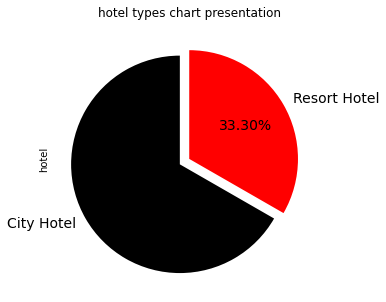

In [ ]:
#let us draw a pie chart for representing different types of hotels present
# atopact for enables us to dispalay percent value "%number.numebrf%%" like .1 will round of till tenth place
#explode used for making a wedge in a pie chart
# startangle for starting at particular angle and rotate from smallest to biggest angle distribution
#figsize for size of fig
#fontsize for give size of font
#colur for providing different colour on pie chart
types_of_hotel_chart=types_of_hotel.plot.pie(autopct='%2.2f%%',explode = (0.1,0),startangle=90,figsize = (10,5),colors = ['black','red'],fontsize = 14)
types_of_hotel_chart.set_title("hotel types chart presentation")

In [ ]:
# for finding details of adults arriving in a types of hotels
adults_analysis=df['adults'].groupby(df['hotel']).value_counts()
print(adults_analysis)

hotel         adults
City Hotel    2         58237
              1         15878
              3          4774
              0           382
              4            31
Resort Hotel  2         31258
              1          6857
              3          1423
              4            31
              0            11
              26            5
              5             2
              20            2
              27            2
              6             1
              10            1
              40            1
              50            1
              55            1
Name: adults, dtype: int64


In [ ]:
#using groupby function for grouping arival of adults in city hotel and resort hotel
adults_analysis1=df['adults'].groupby(df['hotel']).describe()
print(adults_analysis1)

                count      mean       std  min  25%  50%  75%   max
hotel                                                              
City Hotel    79302.0  1.851126  0.509013  0.0  2.0  2.0  2.0   4.0
Resort Hotel  39596.0  1.872942  0.697112  0.0  2.0  2.0  2.0  55.0


In [ ]:
# for finding details of children arriving in a types of hotels
Children_analysis= df['children'].groupby(df['hotel']).value_counts()
print(Children_analysis)

hotel         children
City Hotel    0.0         74196
              1.0          3023
              2.0          2024
              3.0            59
Resort Hotel  0.0         36123
              1.0          1829
              2.0          1626
              3.0            17
              10.0            1
Name: children, dtype: int64


In [ ]:
#using groupby function for grouping arival of childrens in city hotel and resort hotel
Children_analysis1= df['children'].groupby(df['hotel']).describe()
print(Children_analysis1)

                count      mean       std  min  25%  50%  75%   max
hotel                                                              
City Hotel    79302.0  0.091397  0.372230  0.0  0.0  0.0  0.0   3.0
Resort Hotel  39596.0  0.129862  0.447192  0.0  0.0  0.0  0.0  10.0


In [ ]:
# for finding details of babies arriving in a types of hotels
babies_analysis2= df['babies'].groupby(df['hotel']).value_counts()
print(babies_analysis2)

hotel         babies
City Hotel    0         78933
              1           361
              2             6
              9             1
              10            1
Resort Hotel  0         39051
              1           537
              2             8
Name: babies, dtype: int64


In [ ]:
#using groupby function for grouping arival of babies in city hotel and resort hotel
babies_analysis3= df['babies'].groupby(df['hotel']).describe()
print(babies_analysis3)

                count      mean       std  min  25%  50%  75%   max
hotel                                                              
City Hotel    79302.0  0.004943  0.084338  0.0  0.0  0.0  0.0  10.0
Resort Hotel  39596.0  0.013966  0.119061  0.0  0.0  0.0  0.0   2.0


**It seems that mean values for adults,children and babies are higher. This means that resort hotels are better choice for large families**




**2.ANALYSIS FOR CANCELED AND NON CANCELED BOOKING FROM DATASET**

In [ ]:
#assigning 1,0 as canceled and not canceled for particulr dataset
df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = df['is_canceled']
canceled_data.head(20)

0     not_canceled
1     not_canceled
2     not_canceled
3     not_canceled
4     not_canceled
5     not_canceled
6     not_canceled
7     not_canceled
8         canceled
9         canceled
10        canceled
11    not_canceled
12    not_canceled
13    not_canceled
14    not_canceled
15    not_canceled
16    not_canceled
17    not_canceled
18    not_canceled
19    not_canceled
Name: is_canceled, dtype: object

In [ ]:
#counting number of canceled and non cancanceled booking 
df.is_canceled.value_counts()

not_canceled    74745
canceled        44153
Name: is_canceled, dtype: int64

Text(0, 0.5, 'counts')

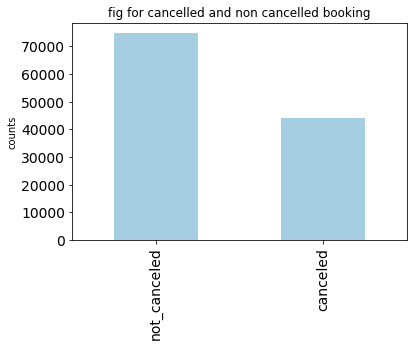

In [ ]:
#ploting bar chart for clear picture of cancellation data/ here colomap is optional/ here we are used matplotlib for plotting
df.is_canceled.value_counts().plot(kind='bar',colormap='Paired',fontsize=14)

plt.title('fig for cancelled and non cancelled booking')
plt.ylabel('counts')



* from the above analysis we can conclude, that majority of the bookings were not canceled.*

**3.Let's look into cancellation rate among different type of hotel**

In [ ]:
# for creating this analysis we can first do operations with cancelled booking
ctype = ['is_canceled', 'hotel']
type_of_hotel_canceled = df[ctype]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')

In [ ]:
print(canceled_hotel)

          hotel  count
0    City Hotel  33076
1  Resort Hotel  11077


Text(0.5, 1.0, 'cancellation rates in city and resort hotel')

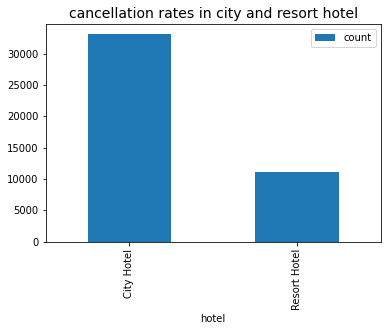

In [ ]:
#ploting chart for cancellation of hotel 
canceled_hotel.plot(kind='bar',x = 'hotel', y = 'count').set_title('cancellation rates in city and resort hotel',fontsize=14)

**conclusion from above chart: 
We have seen a huge proportion of cancellation from city hotel. This was expected since 3/4 of the hotel bookings belong to city hotels. **





**Overview of arrival period**

In [ ]:
# for defferent periods of analysis which month and day is best for hotel booking we can do this analysis
list_of_imp_dates = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = df[list_of_imp_dates]
print(period_arrival)

               hotel  arrival_date_year arrival_date_month  \
0       Resort Hotel               2015               July   
1       Resort Hotel               2015               July   
2       Resort Hotel               2015               July   
3       Resort Hotel               2015               July   
4       Resort Hotel               2015               July   
...              ...                ...                ...   
119385    City Hotel               2017             August   
119386    City Hotel               2017             August   
119387    City Hotel               2017             August   
119388    City Hotel               2017             August   
119389    City Hotel               2017             August   

        arrival_date_day_of_month  
0                               1  
1                               1  
2                               1  
3                               1  
4                               1  
...                           ...  
119

In [ ]:
#for number of arrival in different years
df.arrival_date_year.value_counts()

2016    56435
2017    40604
2015    21859
Name: arrival_date_year, dtype: int64

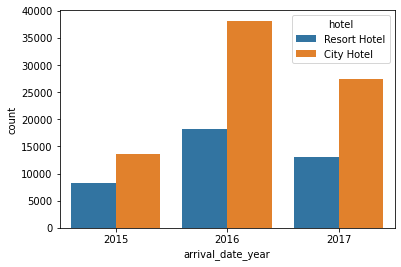

In [ ]:
#here we used seaborn library for presentaion.
sns.countplot(data = period_arrival, x = 'arrival_date_year',hue = 'hotel' )    # hue used for parameter taken coloumn name for colour incoding

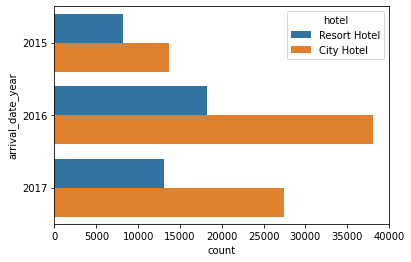

In [ ]:
 # by chnaging x to y presentaion
sns.countplot(data = period_arrival, y = 'arrival_date_year',hue = 'hotel' )  

In [ ]:
#for arrival of differnt month
df.arrival_date_month.value_counts()

August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

Text(0, 0.5, 'Count')

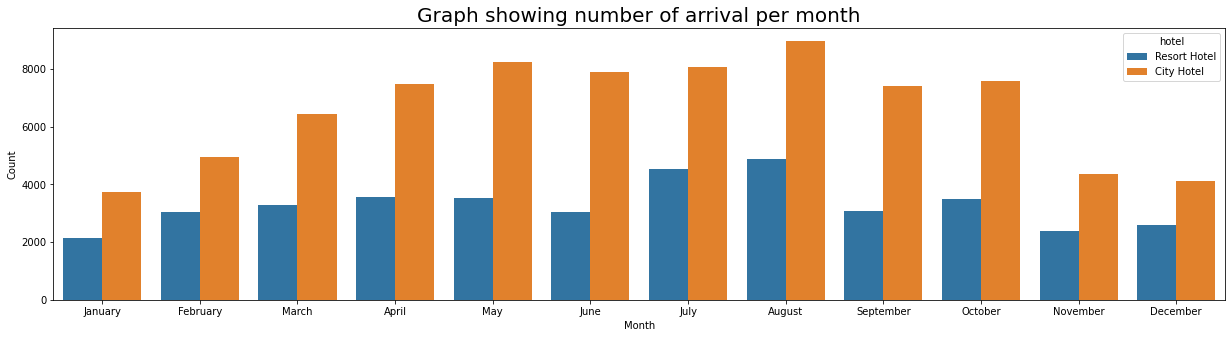

In [ ]:
# presentaion using seaborn library for every month arrival of guest
plt.figure(figsize=(21,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month',hue = 'hotel' ,order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

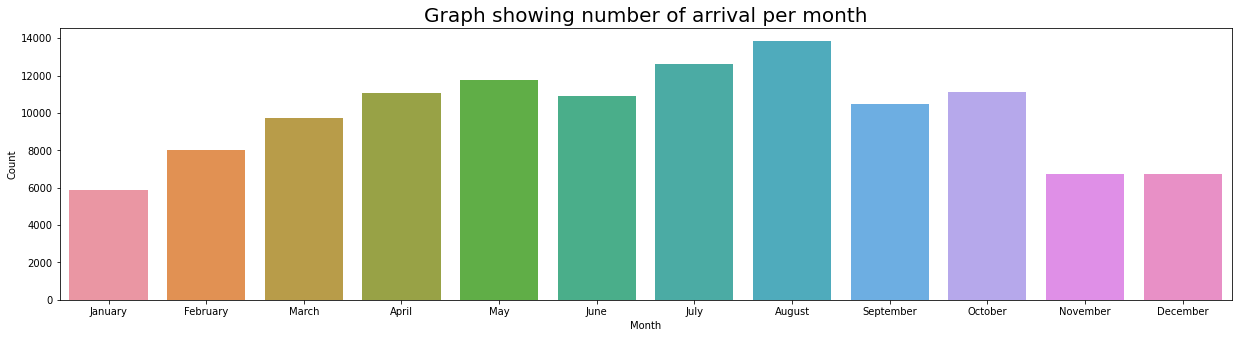

In [ ]:
#presentaion without using hue=month function
plt.figure(figsize=(21,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month' ,order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

Text(0.5, 1.0, 'Graph showing number of arrival per day')

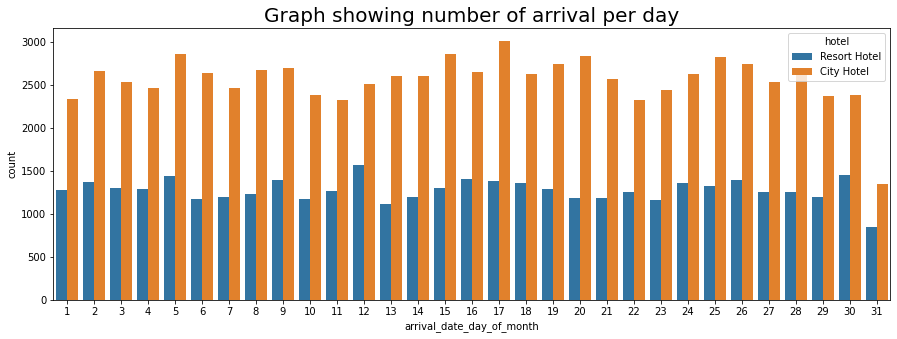

In [ ]:
#for presenting all information at which date arrival is max
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Graph showing number of arrival per day', fontsize = 20)

Text(0.5, 1.0, 'Graph showing number of arrival per day')

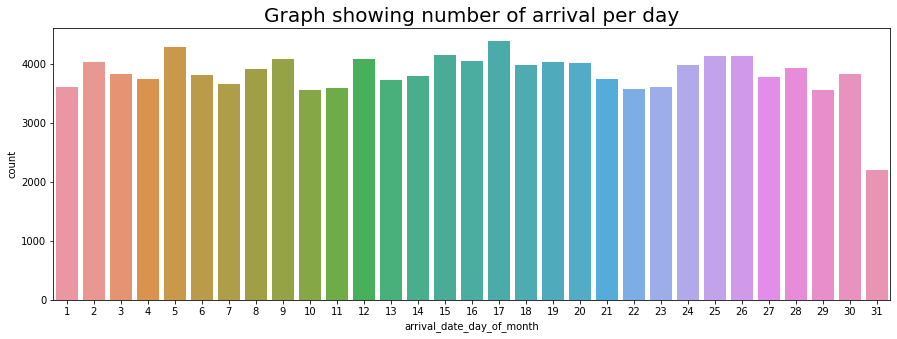

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month' ).set_title('Graph showing number of arrival per day', fontsize = 20)

CONCLUSIONS :

1.   2016 year where hotel booking max
2.   Trend of arrival max in middle of year agust(summer)
3.   Summere period is a peak period 

 The stay is over a weekend or weekday.

Text(0.5, 1.0, 'Number of stays on weekend nights')

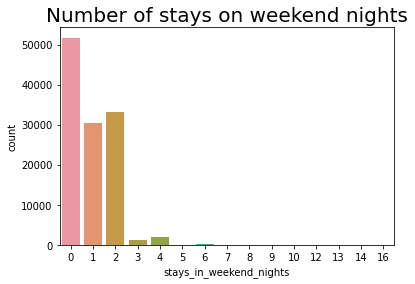

In [ ]:
#Chart for number of stay in weekend night
sns.countplot(data = df, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)

Text(0.5, 1.0, 'Number of stays on weekday night')

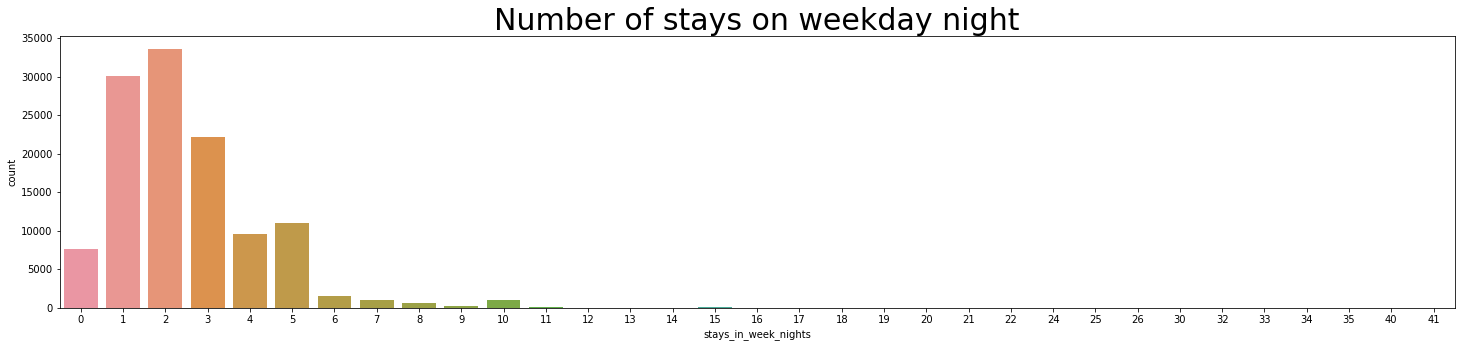

In [ ]:
# for staying in weekday night
plt.figure(figsize=(25,5))

sns.countplot(data = df, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 30)

CONCLUSION
It seems that majority of the stays are over the weekday's night. Hence, it seems that whatever we saw for the chart on day of the month was random.

**Type of visitors**

Text(0.5, 1.0, 'Number of adults')

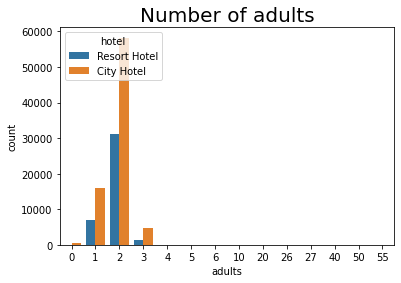

In [ ]:
# number of adults coming and how means double,single, or group
sns.countplot(data = df, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)

Text(0.5, 1.0, 'Number of children')

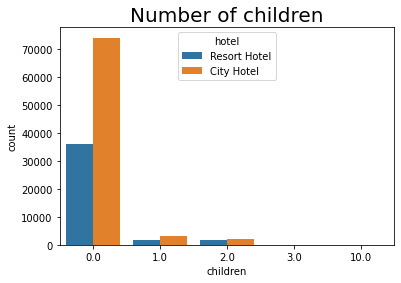

In [ ]:
#childrens number with how many...
sns.countplot(data = df, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)

Text(0.5, 1.0, 'Number of babies')

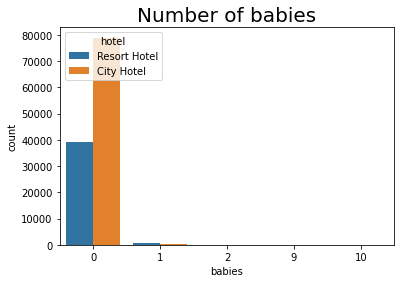

In [ ]:
#babies number with how many are arriving 
sns.countplot(data = df, x = 'babies',hue = 'hotel').set_title("Number of babies", fontsize = 20)

**CONCLUSION**
It seems that majority of the visitors travel in pair. 
Thos that travel with children or babies have no specific preference for the type of hotel. 
We do see that those bringing babies along prefer resort hotels.

Looking into which countries the visitors are from

We will want visitors with no cancellation.

In [ ]:
country_visitors = df[df['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')    # by taking reference from kaggle analysis

# We will be using Plotly.express to plot a choropleth map. Big fan of Plotly here!
import plotly.express as px

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors")

**CONCLUSION**
We have a huge number of visitors from western europe, namely France,UK and Portugal being the highest.



**Looking into market segments and distribution channel**

Text(0.5, 1.0, 'Types of market segment')

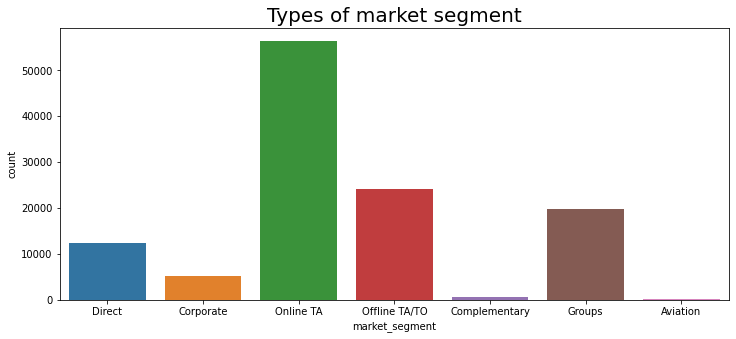

In [ ]:
#ploting for types of market segment
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'market_segment').set_title('Types of market segment', fontsize = 20)

Text(0.5, 1.0, 'Types of distribution channel')

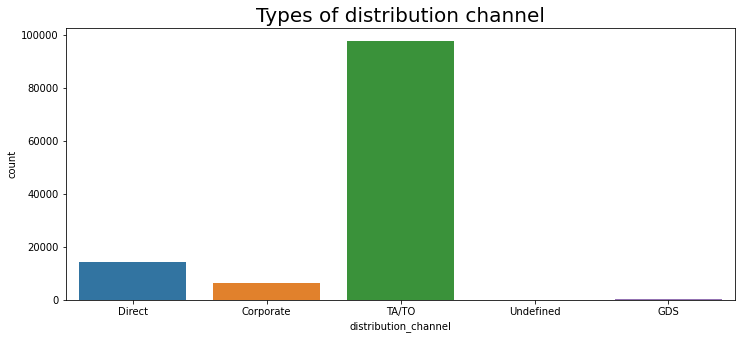

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

**Conclusion**
Majority of the distribution channels and market segments involve travel agencies (online or offline).
We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.

Text(0.5, 1.0, 'Graph showing types of deposits')

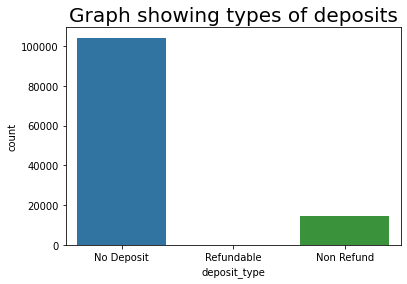

In [ ]:
sns.countplot(data = df, x = 'deposit_type').set_title('Graph showing types of deposits', fontsize = 20)

Majority of the booking does not require deposit. That could explain why cancellation rate was actually 50% of non-cancellation rate.

Overview of repeated guests

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

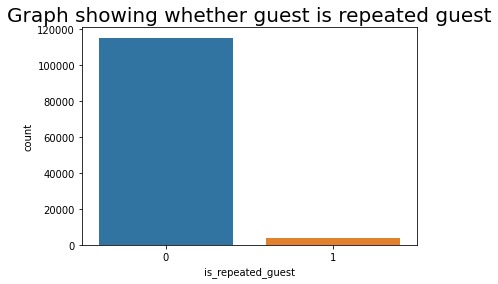

In [ ]:
sns.countplot(data = df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)

**CONCLUSION**

Low number of repeated guests.
A need to target repeated guests since they have booked before.for business expenditure

            IMP PART THIS WILL SHOW AT WHICH MONTH WE WILL DO BOOKING FOR LEAST 
            PRICE

Looking into prices per month per hotel

average daily rate =  Sum Of All Lodging Transaction/Total Number Of Staying  Night  

average daily rate per person =  ADR/Adults+Children 

We will need to find out average daily rate per person

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



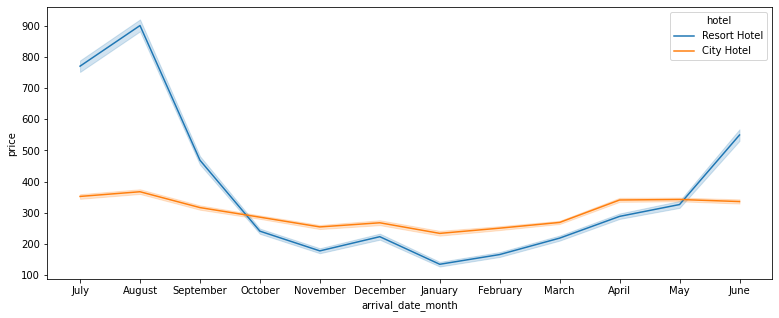

In [ ]:
# Resizing plot 
plt.figure(figsize=(13,5))

# Calculating average daily rate per person
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests = df.loc[df["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')

**CONCLUSION**
Prices of resort hotel are much higher. It seems that that is definitely the case since resort hotels specialise in that.
Prices of city hotel do not fluctuate that much.

**SUMMARY**


1.  Majority of the hotels booked are city hotel.
2.  the high rate of cancellations can be due high no deposit policies.
3.  higest arrival will be may to August, summer period
4.  Majority of the guests are from Western Europe
5.  Nov to Jan Month is least price for hotel
6.  Majority of guest are non repeating we can use advertisemnet and some discount for repeated guest







                           **COMPLEATED FIRST EDA THANKS ALMABETTER**